# 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
PATH = 'C:/numpyPandasTestest/정리/machine_learning/dacon_LG/data/'

In [4]:
train_err  = pd.read_csv(PATH+'train_err_data.csv')
train_problem  = pd.read_csv(PATH+'train_problem_data.csv')
train_quality = pd.read_csv(PATH+'train_quality_data.csv')


,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0


In [9]:
train_problem.shape

(5429, 2)

#### train 데이터 

파일명|설명|칼럼명|행렬 사이즈
--|--|--|--
train_err_data.csv|시스템에 발생한 에러 로그|user_id, time, model_nm, fwver, errtype, errcode|(16554663, 6)
train_quality_data.csv|시스템 퀄리티 로그|time, user_id, fwver, quality_0 ~ quality_12|(828624, 16)
train_problem_data.csv|사용자 불만 및 불만이 접수된 시간|user_id, time|(5429,  2)

칼럼명|설명|값 or 형식|갯수
--|--|--|--|
user_id|유저 id|10000 ~ 24999|15000|
time|에러로그가 기록된 시간|YYYYMMDDhhmmss|16554663
model_nm|모델명|model0 ~ model8|9
errtype|에러타입|1 ~ 42 (29 제외) |41 
errcode|에러코드|정수 or 문자열|2806
fwver|펌웨어|xx.xx.xxxx|37
quality_0 ~ quality_12|퀄리티 로그|정수 

In [10]:
test_err  = pd.read_csv(PATH+'test_err_data.csv')
test_quality = pd.read_csv(PATH+'test_quality_data.csv')
submission  = pd.read_csv(PATH+'sample_submission.csv')

#### test 데이터

In [13]:
test_quality.shape

(747972, 16)

파일명|설명|칼럼명|행렬 사이즈
--|--|--|--
test_err_data.csv|시스템에 발생한 에러 로그|user_id, time, model_nm, fwver, errtype, errcode|(16532648, 6)
test_quality_data.csv|시스템 퀄리티 로그|time, user_id, fwver, quality_0 ~ quality_12|(747972, 16)
sample_submission.csv|사용자 불만 확률(0 ~ 1)|user_id, problem|(14999,  2)

#### train_summary

In [15]:
PATH1 = 'C:/numpyPandasTestest/정리/machine_learning/dacon_LG\data_astpye/'

In [19]:
train_summary = pd.read_csv(PATH1+'train_summary.csv', index_col=0)
train_summary.head(5)

,user_id,quality,problem,n_errlogs,n_errtypes,n_models,n_fwvers,errtype_1,errtype_2,errtype_3,...,errtype_42,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8
0,10000,0.0,1.0,317,14,1,1,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,317.0,0.0,0.0,0.0,0.0,0.0
1,10001,1.0,0.0,2365,26,1,2,0.0,0.0,0.0,...,1.0,0.0,0.0,2365.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,0.0,1.0,306,16,1,1,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,306.0,0.0,0.0,0.0,0.0,0.0
3,10003,0.0,0.0,306,18,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,306.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10004,1.0,1.0,777,18,1,2,0.0,0.0,0.0,...,2.0,777.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


칼럼명|설명|값 
--|--|--
user_id|유저 id|10000 ~ 24999
quality|퀄리티로그 유뮤|0, 1
problem|불만 접수 유무|0, 1
n_errlogs|에러로그 수|정수
n_errtypes|에러타입 수|정수
n_models|모델 수|정수
n_fwvers|펌웨어수 수|정수

전체 15000명의 유저 중 불만 접수를 한 유저는 10000명, 하지 않은 유저는 5000명  
--> 불만 접수를 한 그룹과 하지 않은 그룹으로 나눠서 분석 진행

# 에러로그 분석 

#### err log 수 비교

In [ ]:
df = pd.read_csv(PATH1+'err_problem_summary.csv', index_col=0)
noproblem = df[df['problem'] == 0]
problem = df[df['problem'] == 1]

         no_problem        problem
count   10000.00000    5000.000000
mean      896.58820    1517.756200
std      2665.05613    4857.527435
min         1.00000       2.000000
25%       335.00000     563.000000
50%       577.00000     849.000000
75%       906.00000    1348.000000
max    195538.00000  222186.000000


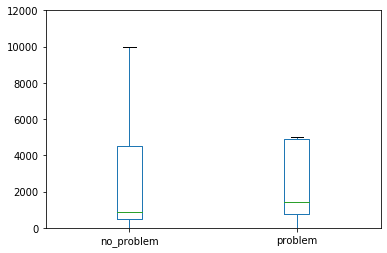

In [110]:
no_df = noproblem[['n_errlogs']].describe()
pr_df = problem[['n_errlogs']].describe()
df = pd.DataFrame(no_df.values, columns=['no_problem'], index=no_df.index)
df['problem'] = pr_df.values
print(df)
df.plot(kind='box')
plt.ylim(0, 12000)
plt.show()

--|불만 접수를 한 그룹|불만 접수를 하지 않은 그룹
--|--|--
평균 에러 로그 수|1518건|897건

불만 접수를 한 그룹의 평균 에러 로그 수는 불만 접수를 안한 그룹의 로그 수의 1.69배

#### err type 수 비교

         no_problem      problem
count  10000.000000  5000.000000
mean      14.050500    18.106800
std        4.494082     4.817721
min        1.000000     1.000000
25%       11.000000    15.000000
50%       14.000000    18.000000
75%       17.000000    22.000000
max       28.000000    32.000000


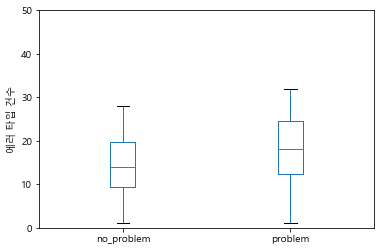

In [123]:
no_df = noproblem[['n_errtypes']].describe()
pr_df = problem[['n_errtypes']].describe()
df = pd.DataFrame(no_df.values, columns=['no_problem'], index=no_df.index)
df['problem'] = pr_df.values
print(df)
df.plot(kind='box')
plt.ylim(0, 50)
plt.ylabel('에러 타입 건수')
plt.show()

--|불만 접수를 한 그룹|불만 접수를 하지 않은 그룹
--|--|--
평균 에러 타입 수|18건|14건

평균 에러 타입 수는 불만 접수를 한 그룹이 좀 더 많지만  
다양한 타입의 에러의 발생이 불만 접수를 유도했다고 보기는 힘들 것 같음

#### err type별 카운트 비교

In [266]:
a = np.empty((15000,42))
a[:] = np.nan
errtype_df = pd.DataFrame(a, columns=range(1, 43))     
errtype_df

for i, row in df.iterrows():
    type_list = row['errtype'][1:-1].split()
    a = []
    for j in type_list:
        a.append(int(j))
    errtype_df.loc[i,a] = 1


In [267]:
p = errtype_df[df['problem'] == 1]
n = errtype_df[df['problem'] == 0]
errtype_count_df = pd.DataFrame(p.sum(), index=errtype_df.columns, columns=['problem'])
errtype_count_df['no problem'] = n.sum()
errtype_count_df

1       950.0
2       390.0
3      1679.0
4      6881.0
5     11010.0
6      6467.0
7      7648.0
8        64.0
9        63.0
10     2360.0
11    14767.0
12    14799.0
13     3711.0
14     7891.0
15    14545.0
16    14431.0
17     5747.0
18     1768.0
19      419.0
20     1546.0
21      381.0
22    10281.0
23    10046.0
24     2519.0
25      420.0
26    13026.0
27     2267.0
28     2275.0
29        0.0
30      375.0
31    11091.0
32     1933.0
33    11074.0
34     3733.0
35     2039.0
36     8435.0
37     8434.0
38     1822.0
39      766.0
40    10462.0
41     6142.0
42     6382.0
dtype: float64

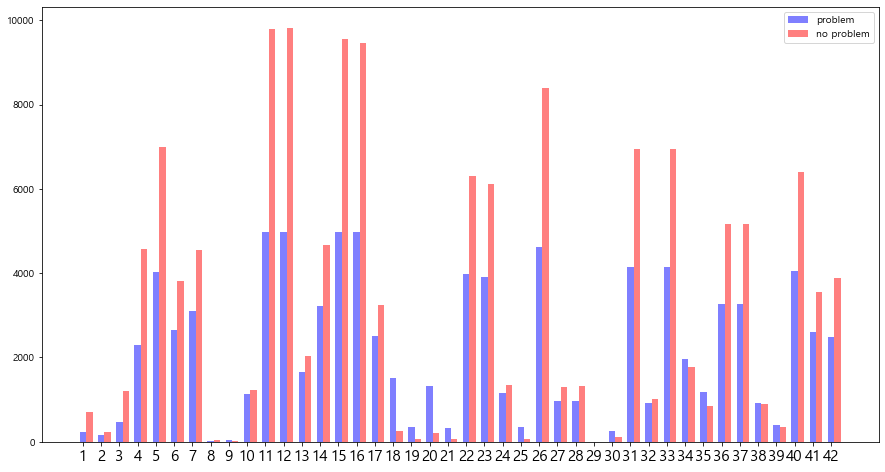

In [298]:
bar_width = 0.35
alpha = 0.5
   
plt.figure(figsize=(15,8))
p1 = plt.bar(errtype_count_df.index, errtype_count_df.iloc[:,0], bar_width, color='b', alpha=alpha,label='problem')
p2 = plt.bar(errtype_count_df.index + bar_width, errtype_count_df.iloc[:,1], bar_width, 
             color='r', alpha=alpha, label='no problem')

plt.xticks(errtype_count_df.index, fontsize=15)
plt.legend()
plt.show()


불만 접수 유무에 따라 데이터 갯수차이가 크므로 MinMaxScaler를 이용하여 0, 1사이 값으로 변환 후 비교

In [331]:
scaleX = MinMaxScaler()
dataS = scaleX.fit_transform(errtype_count_df)      

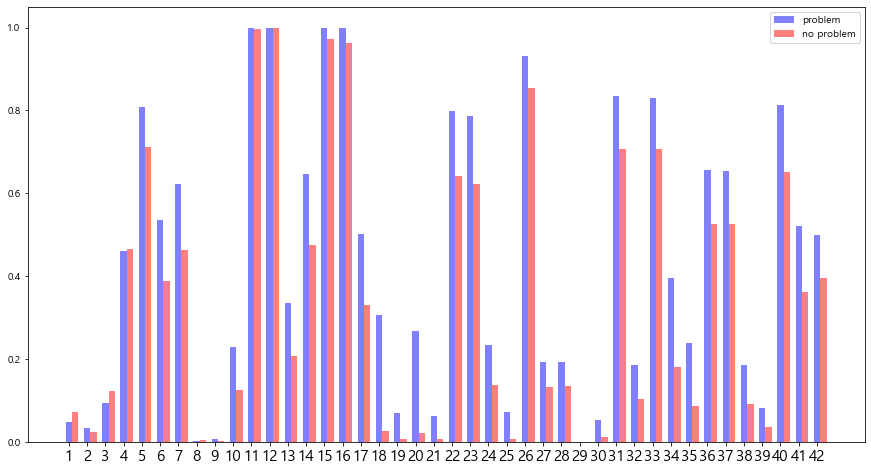

In [311]:
bar_width = 0.35
alpha = 0.5
   
plt.figure(figsize=(15,8))
p1 = plt.bar(errtype_count_df.index, dataS[:,0], bar_width, color='b', alpha=alpha,label='problem')
p2 = plt.bar(errtype_count_df.index + bar_width, dataS[:,1], bar_width, 
             color='r', alpha=alpha, label='no problem')

plt.xticks(errtype_count_df.index, fontsize=15)
plt.legend()
plt.show()


불만 접수 발생 유무에 따라 카운트 수가 차이가 나는 에러 타입에 주목할 필요가 있어 보임  
    - 특히, 18, 20번 err type의 경우 불만 접수를 하지 않은 그룹에서는 거의 발생하지 않았지만  
      불만 접수를 한 그룹에서는 상대적으로 발생 건수가 높음

In [23]:
train_quality = pd.read_csv(PATH1+'train_quality_data.csv',  thousands=',', parse_dates=['time'])
train_problem = pd.read_csv(PATH1+'train_problem_data.csv',  thousands=',', parse_dates=['time'])
train_err     = pd.read_csv(PATH1+'train_err_data.csv'    ,  thousands=',', parse_dates=['time'])

train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000
test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999

train_quality["quality_0"] = train_quality.quality_0.astype(float)
train_quality["quality_1"] = train_quality.quality_1.astype(float)
train_quality["quality_2"] = train_quality.quality_2.astype(float)
train_quality["quality_3"] = train_quality.quality_3.astype(float)
train_quality["quality_4"] = train_quality.quality_4.astype(float)
train_quality["quality_5"] = train_quality.quality_5.astype(float)
train_quality["quality_6"] = train_quality.quality_6.astype(float)
train_quality["quality_7"] = train_quality.quality_7.astype(float)
train_quality["quality_8"] = train_quality.quality_8.astype(float)
train_quality["quality_9"] = train_quality.quality_9.astype(float)
train_quality["quality_10"] = train_quality.quality_10.astype(float)
train_quality["quality_11"] = train_quality.quality_11.astype(float)
train_quality["quality_12"] = train_quality.quality_12.astype(float)

train_quality = train_quality.drop_duplicates()
train_quality

train_quality1 = train_quality.set_index('user_id')

# 퀄리티 로그 분석

퀄리티 로그는 두 시간 단위로 10분마다 발생

#### train quality별 상관관계

In [24]:
train_quality1.corr()

,Unnamed: 0,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
Unnamed: 0,1.000000,0.006725,-0.002338,0.003485,NaN,NaN,-0.002711,-0.017755,-0.021785,0.004290,0.007219,-0.004483,-0.007481,0.019491
quality_0,0.006725,1.000000,0.004306,0.999535,NaN,NaN,0.067673,-0.000135,0.000681,-0.001136,0.531695,0.032338,0.006627,0.009599
quality_1,-0.002338,0.004306,1.000000,0.002976,NaN,NaN,0.010617,0.028869,0.016226,0.619596,-0.001262,0.001312,0.562785,0.002337
quality_2,0.003485,0.999535,0.002976,1.000000,NaN,NaN,0.068949,0.001121,0.000644,-0.000181,0.478036,0.029388,0.006914,0.004986
quality_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_5,-0.002711,0.067673,0.010617,0.068949,NaN,NaN,1.000000,0.008326,0.009076,0.000228,0.037116,0.621752,0.024101,0.037750
quality_6,-0.017755,-0.000135,0.028869,0.001121,NaN,NaN,0.008326,1.000000,0.810524,0.000779,0.001073,0.012187,0.043297,-0.006372
quality_7,-0.021785,0.000681,0.016226,0.000644,NaN,NaN,0.009076,0.810524,1.000000,0.000982,0.001351,0.015014,0.026689,-0.007758
quality_8,0.004290,-0.001136,0.619596,-0.000181,NaN,NaN,0.000228,0.000779,0.000982,1.000000,-0.000389,0.000378,-0.000689,0.010314


quality_3, quality_4는 모든 사례에서 값이 없음

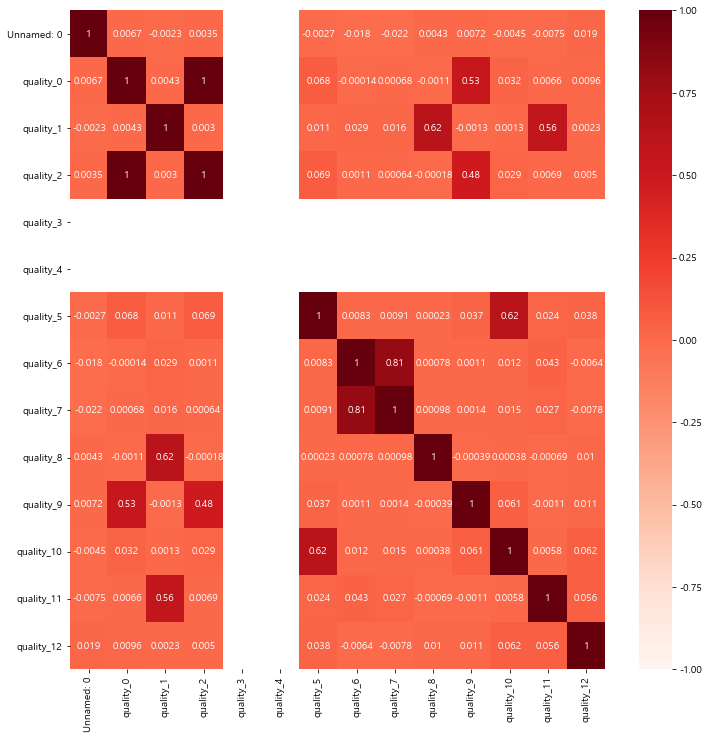

In [25]:
plt.figure(figsize=(12,12.12))
sns.heatmap(train_quality1.corr(),vmin=-1, vmax = 1, cmap='Reds', annot=True)
plt.show()

퀄리티 5-10, 퀄리티 6-7, 퀄리티 0-9, 퀄리티 2-9, 퀄리티 1-8은 어느정도 상관관계가 있다는 것을 확인

####  quality_problem_count, quality_noploblem_count 비교

In [27]:
train_quality.set_index('user_id',inplace=True)
train_problem.set_index('user_id',inplace=True)

# 불만신고접수한 id (-1)
quality_problem = pd.merge(train_quality,train_problem, on='user_id')
quality_problem = quality_problem.rename({'time_x':'quality_time','time_y':'problem_time'}, axis='columns')
quality_problem = quality_problem[['fwver','quality_time','problem_time','quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]
sr_complain = quality_problem.index.unique()
quality_problem_nan = quality_problem.replace(0,np.NaN) # 카운트를 하기 위해 nan으로 변경
# 불만신고접수한 id(count)
quality_problem_count = quality_problem_nan.groupby('user_id').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]

# 불만신고접수하지 않은 id
quality_noploblem = train_quality.drop(index=quality_problem_count.index) 
quality_noploblem_nan = quality_noploblem.replace(0,np.NaN) # 카운트를 하기 위해 nan으로 변경
# 불만신고접수한 id(count)
quality_noploblem_count = quality_noploblem_nan.groupby('user_id').count()[['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']]


quality_noploblem # 불만신고접수하지 않은 id <br>
quality_problem # 불만신고접수한 id (-1)<br>
quality_problem_count # 불만신고접수한 id(count)<br>
quality_noploblem_count # 불만신고접수하지 않은 id(count)<br>
quality_problem.index.unique() # 퀄리티 오류로 인해 불만신고접수한 id 수 (3167)<br>
quality_noploblem.index.unique() # 퀄리티 오류는 떴으나 불만신고접수하지 않은 id 수 (5114)

--|quality_0|quality_1|quality_2|quality_3|quality_4|quality_5|quality_6|quality_7|quality_8|quality_9|quality_10|quality_11|quality_12
--|--|--|--|--|--|--|--|--|--|--|--|--|--
quality_problem_count|2260|2387|2337|0|0|3035|2520|1045|634|124|2973|2333|129
quality_noploblem_count|3147|3535|3437|0|0|4863|3768|1125|632|256|4729|3449|148

불만신고접수에 있어 특정 퀄리티 오류가 영향을 주지 않는 것을 확인

분류|사람 수 
--|--
퀄리티 오류로 인해 불만신고접수한 사람|3167명  
퀄리티 오류는 발생했으나 불만신고접수 하지 않은 사람|5114명 
퀄리티 오류가 발생하지 않았으나 불만을 접수한 사람|1833명 (5000-3167)  

#### fmver 

펌웨어 버전의 변화와 사용자 불편이 상관관계가 있을 것이라 추측

In [32]:
fwver_all = pd.read_csv(PATH1 + 'fwver_all.csv')
fwver_all

,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,03.11.1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,03.11.1149,0.0,1.0,4.0,0.0,0.0,24.0,1.0,0.0,0.0,6.0,42.0,1.0,0.0
2,03.11.1167,0.0,3079.0,3604.0,0.0,0.0,13315.0,3182.0,1219.0,1345.0,1972.0,18817.0,4415.0,4825.0
3,04.16.2641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,04.16.3345,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0
5,04.16.3439,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,0.0,3.0,0.0,0.0
6,04.16.3553,3758.0,4571.0,3761.0,0.0,0.0,30122.0,5097.0,3045.0,2842.0,24.0,37050.0,3770.0,47.0
7,04.16.3569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,04.16.3571,69.0,85.0,69.0,0.0,0.0,457.0,88.0,49.0,50.0,0.0,616.0,69.0,0.0
9,04.22.1442,3.0,3.0,3.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0,20.0,3.0,0.0
